* [1.Présentation des données](#pd)
* [2.Prétraitement des données](#prd)
* [3.Analyse exploratoire](#ax)
* [4.Création du datset commandes et sauvegrde des données](#com)

In [6]:
import warnings
from matplotlib.gridspec import GridSpec
from datetime import timedelta
import missingno as msno
import pandas as pd
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
warnings.filterwarnings('ignore')

In [7]:
os.getcwd()
#os.chdir('C:\\Users\\IMEN\\Documents\\openclassroom\\formation openclassrooms\\projet5')

'C:\\Users\\imen2\\OneDrive\\Documents\\Openclassrooms\\formation_OC\\projet5\\rectif'

### 1.Présentation des données<a class="anchor" id="pd"></a>

In [8]:
csv_files = glob.glob(os.path.join('datasets', "*.csv"))
csv_files

['datasets\\olist_customers_dataset.csv',
 'datasets\\olist_geolocation_dataset.csv',
 'datasets\\olist_orders_dataset.csv',
 'datasets\\olist_order_items_dataset.csv',
 'datasets\\olist_order_payments_dataset.csv',
 'datasets\\olist_order_reviews_dataset.csv',
 'datasets\\olist_products_dataset.csv',
 'datasets\\olist_sellers_dataset.csv',
 'datasets\\product_category_name_translation.csv']

In [9]:
# 9 dataframe (df1..df9)
for i in range(len(csv_files)):
    data = pd.read_csv(csv_files[i])
    globals()[f'df{i+1}'] = data

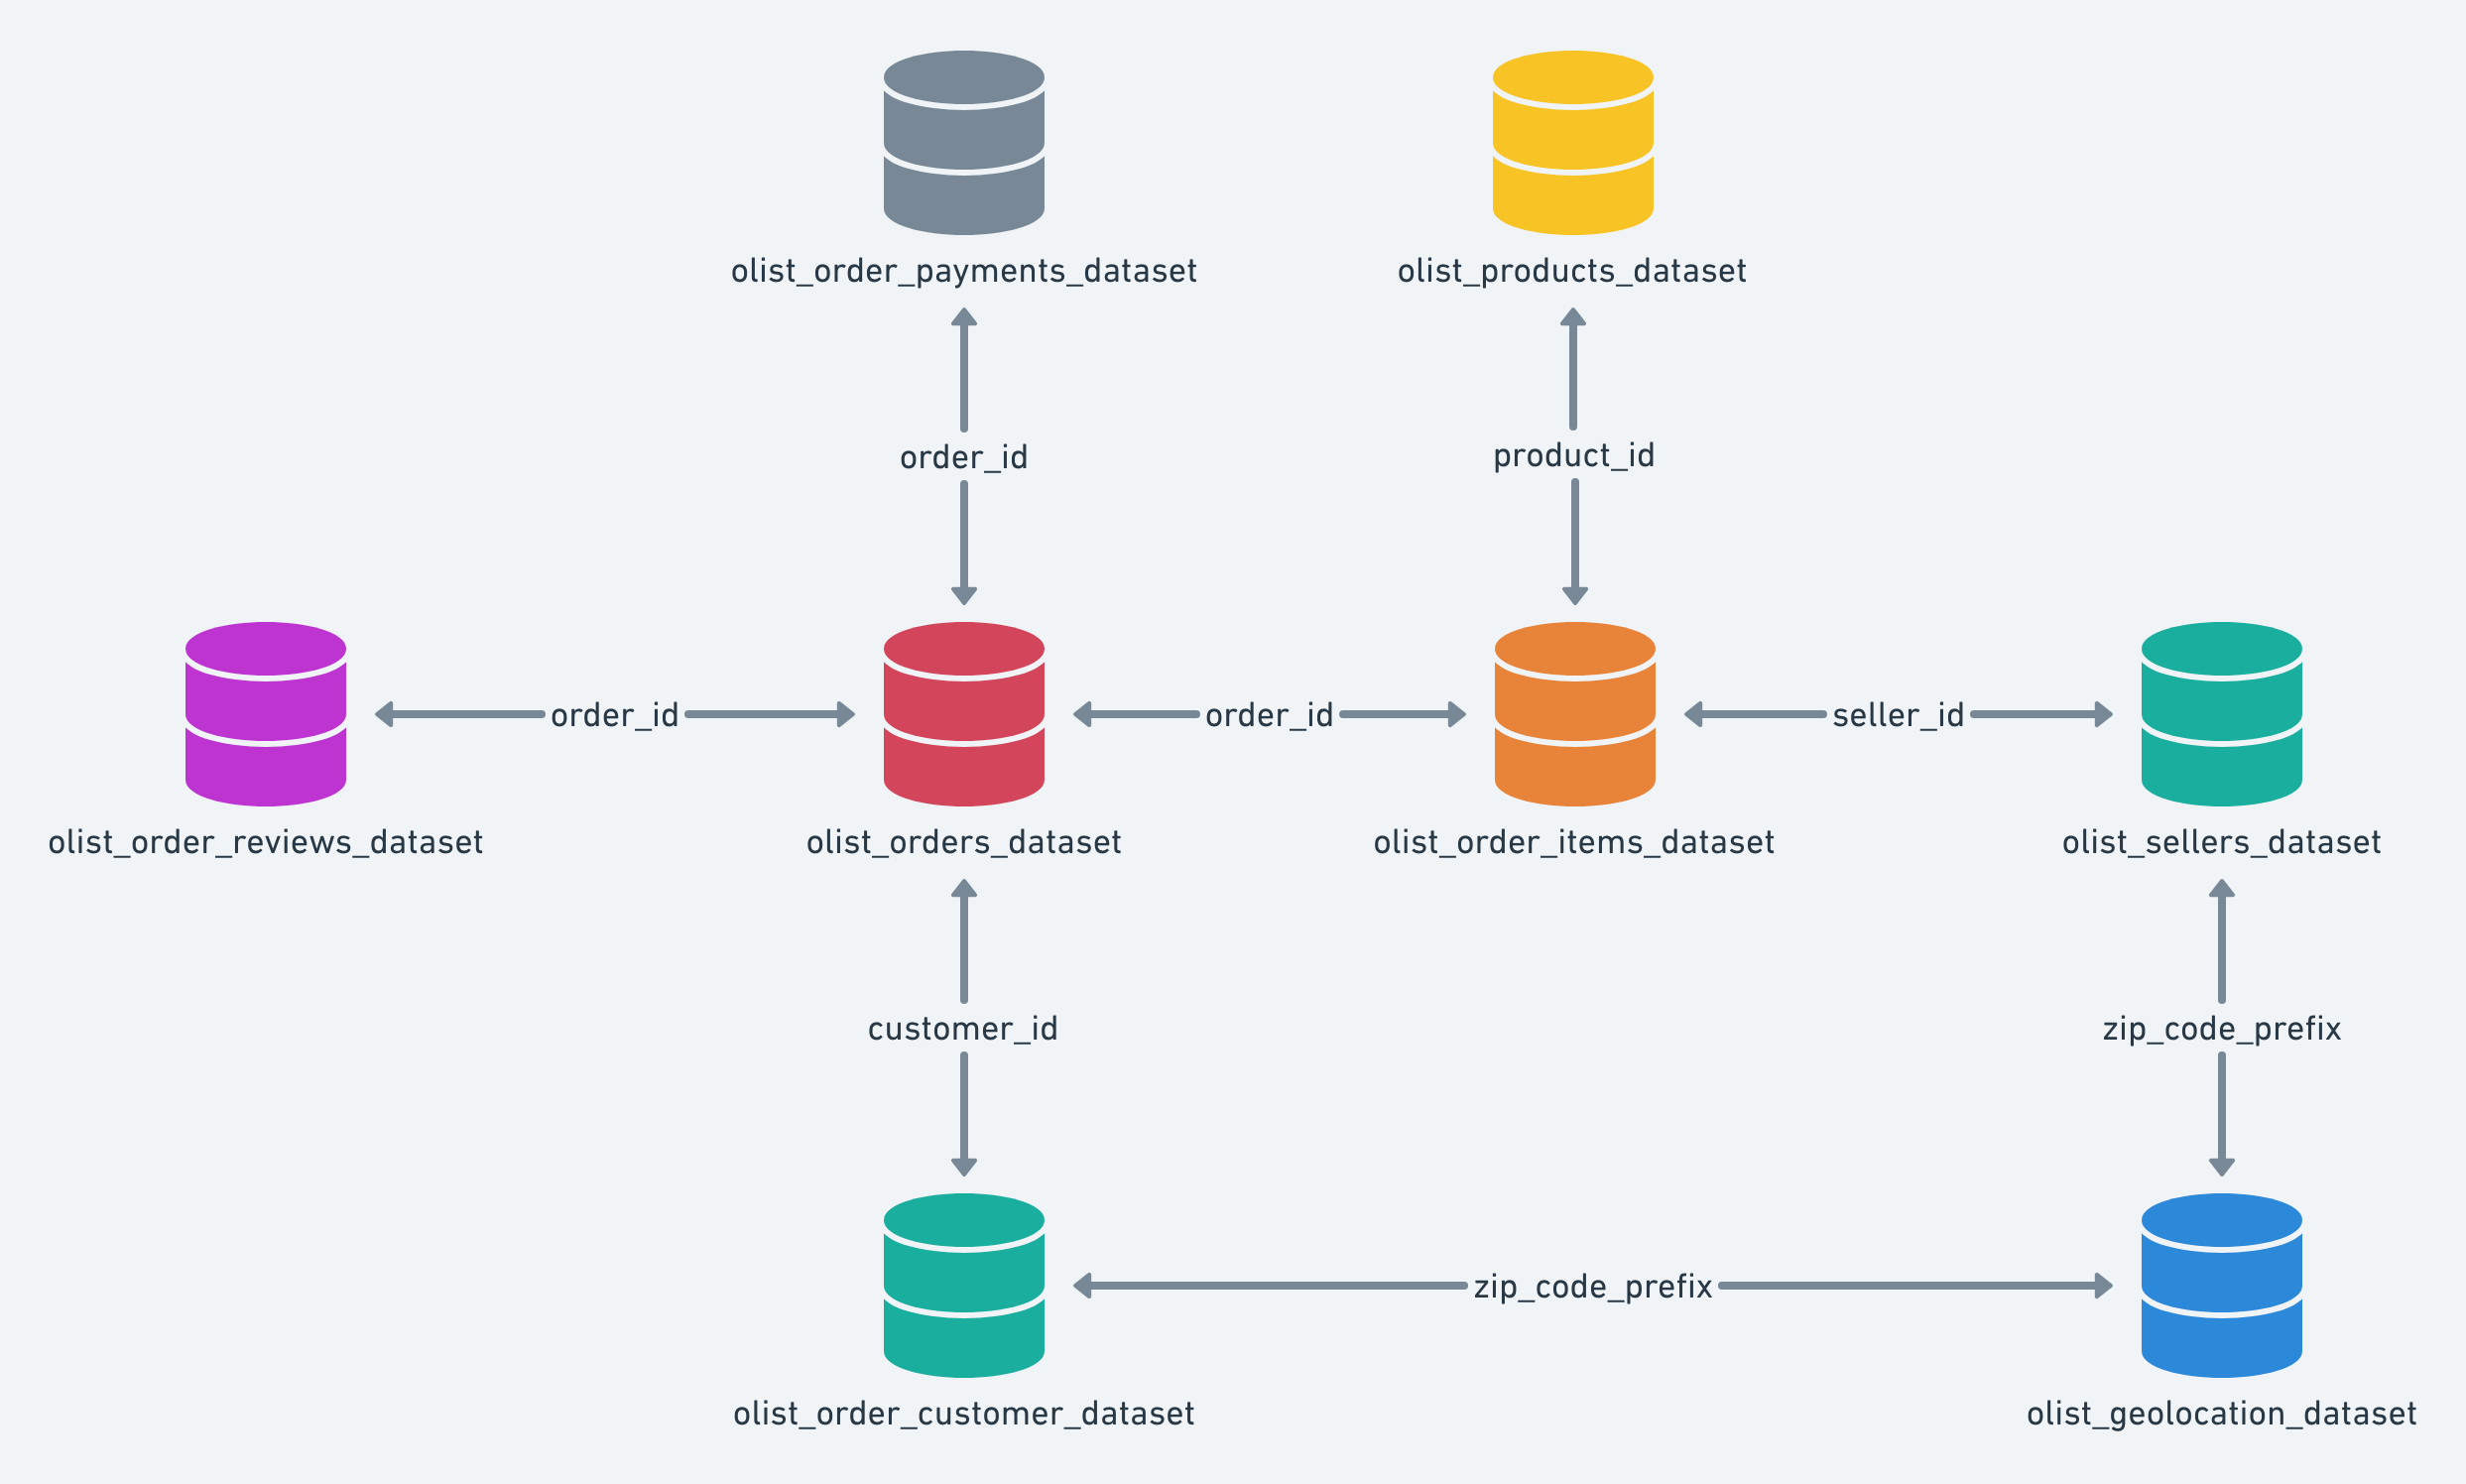

In [10]:
from IPython.display import Image
Image(filename='HRhd2Y0.png', width=600, height=600)

In [11]:
datasets = ['olist_customers_dataset', 'olist_geolocation_dataset', 'olist_orders_dataset',
            'olist_order_items_dataset.csv', 'olist_order_payments_dataset', 'olist_order_reviews_dataset',
            'olist_products_dataset', 'olist_sellers_dataset']
Descriptions = ['informations sur le client et son emplacement',
                ' informations sur les codes postaux brésiliens et leurs coordonnées', 'indormations sur les commandes',
                'données sur les articles achetés dans chaque commande', 'données sur les options de paiement des commandes',
                'données sur les évaluations faites par les clients',
                'données sur les produits vendus par Olist', 'données sur les vendeurs qui ont exécuté les commandes passées sur Olist']
dic = {'Variable': ['df1', 'df2', 'df3', 'df4', 'df5', 'df6',
                    'df7', 'df8'], 'Dataset': datasets, 'Description': Descriptions}
pd.set_option("display.max_colwidth", None,
              'display.colheader_justify', 'center')
data_description = pd.DataFrame(dic)
data_description

,Variable,Dataset,Description
0,df1,olist_customers_dataset,informations sur le client et son emplacement
1,df2,olist_geolocation_dataset,informations sur les codes postaux brésiliens et leurs coordonnées
2,df3,olist_orders_dataset,indormations sur les commandes
3,df4,olist_order_items_dataset.csv,données sur les articles achetés dans chaque commande
4,df5,olist_order_payments_dataset,données sur les options de paiement des commandes
5,df6,olist_order_reviews_dataset,données sur les évaluations faites par les clients
6,df7,olist_products_dataset,données sur les produits vendus par Olist
7,df8,olist_sellers_dataset,données sur les vendeurs qui ont exécuté les commandes passées sur Olist


In [12]:
df3.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [13]:
ds = [df1, df2, df3, df4, df5, df6, df7, df8]

In [14]:
for d in ds:
    print(d.columns)
    print('-'*20)
    print(d.describe())
    print('*'*100)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
--------------------
       customer_zip_code_prefix
count        99441.000000      
mean         35137.474583      
std          29797.938996      
min           1003.000000      
25%          11347.000000      
50%          24416.000000      
75%          58900.000000      
max          99990.000000      
****************************************************************************************************
Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')
--------------------
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count         1.000163e+06           1.000163e+06     1.000163e+06  
mean          3.657417e+04          -2.117615e+01    -4.639054e+01  
std           3.054934e+04           5.715866e+00     4.269748e+00  
min      

### 2.Prétraitement des données<a class="anchor" id="prd"></a>

#### Dataframes et valeurs nulles

In [15]:
# msno.bar(df1):ok
# msno.bar(df2):ok
# msno.bar(df3)#contient des nan
# msno.bar(df4)#ok
# msno.bar(df5)#ok
# msno.bar(df6)#contient des nan
# msno.bar(df7)#contient des nan
# msno.bar(df8)#ok

In [16]:
# supprimer les lignes contenant des nan
df3.dropna(axis=0, inplace=True)
df7.dropna(axis=0, inplace=True)
# pour df6 les colonnes contenant des nan sont review_comment_title et review_content_message ==>je supprime ces deux colonnes
df6.dropna(axis=1, inplace=True)

In [17]:
for d in ds:
    print(d.columns)
    print('\n')

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')


Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')


Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')


Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')


Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')


Index(['product_id', 'product_category_name', 'product_name_lenght',
  

#### Dataframes et lignes dupliquées

In [18]:
# print('Entrées dupliquées: {}'.format(df1.duplicated().sum()))#0
print('Entrées dupliquées: {}'.format(df2.duplicated().sum()))
df2.drop_duplicates(inplace=True)
# print('Entrées dupliquées: {}'.format(df3.duplicated().sum()))#0
# print('Entrées dupliquées: {}'.format(df4.duplicated().sum()))#0
# print('Entrées dupliquées: {}'.format(df5.duplicated().sum()))#0
# print('Entrées dupliquées: {}'.format(df6.duplicated().sum()))#0
# print('Entrées dupliquées: {}'.format(df7.duplicated().sum()))#0
# print('Entrées dupliquées: {}'.format(df8.duplicated().sum()))#0

Entrées dupliquées: 261831


#### Dataframes et suppression de lignes

In [19]:
# supprimer les commnandes annulées et non valables
df3 = df3[df3.order_status != 'canceled']
df3 = df3[df3.order_status != 'unavailable']

In [20]:
df3.order_status.unique()

array(['delivered'], dtype=object)

### 3. Analyse exploratoire <a class="anchor" id="ax"></a>

#### Nombre de commande par clients

In [21]:
# nbre de commandes par client
nb_order_per_customer = pd.DataFrame(df1.groupby('customer_unique_id')['customer_id'].count())\
    .rename(columns={'customer_id': 'Nb'}).reset_index()
nb_order_per_customer

,customer_unique_id,Nb
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
96091,fffcf5a5ff07b0908bd4e2dbc735a684,1
96092,fffea47cd6d3cc0a88bd621562a9d061,1
96093,ffff371b4d645b6ecea244b27531430a,1
96094,ffff5962728ec6157033ef9805bacc48,1


In [22]:
# Clients avec plusieurs commandes
customer_with_many_orders = nb_order_per_customer[nb_order_per_customer['Nb'] > 1]
per_cust_with_many_orders = round(
    100*customer_with_many_orders.shape[0]/nb_order_per_customer.shape[0], 2)
print(f'{per_cust_with_many_orders} % des clients ayant réalisés plusieurs commandes')

3.12 % des clients ayant réalisés plusieurs commandes


In [23]:
# Clients avec une seule commande
customer_with_one_order = nb_order_per_customer[nb_order_per_customer['Nb'] == 1]
per_cust_with_one_order = round(
    100*customer_with_one_order.shape[0]/nb_order_per_customer.shape[0], 2)
print(f'{per_cust_with_one_order} % des clients ayant réalisés une seule commande')

96.88 % des clients ayant réalisés une seule commande


In [24]:
df12 = df2.join(df1.set_index(['customer_zip_code_prefix', 'customer_city', 'customer_state']), on=[
                'geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], how='right')
df12

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,customer_id,customer_unique_id
334422,14409,-20.509897,-47.397866,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334449,14409,-20.497396,-47.399241,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334459,14409,-20.510459,-47.399553,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334462,14409,-20.480940,-47.394161,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
334463,14409,-20.515413,-47.398194,franca,SP,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0
...,...,...,...,...,...,...,...
174120,6703,-23.598092,-46.904582,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174153,6703,-23.594171,-46.908091,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174253,6703,-23.599369,-46.905603,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398
174263,6703,-23.584425,-46.892014,cotia,SP,274fa6071e5e17fe303b9748641082c8,84732c5050c01db9b23e19ba39899398


In [25]:
# Géolocalisation des clients
# map = folium.Map()
# map = folium.Map(location=[df12['geolocation_lat'].mean(), df12['geolocation_lng'].mean()],zoom_start=10)
# for i in range(0,len(df12)):
#     folium.Circle([df12.iloc[i]['geolocation_lat'],df12.iloc[i]['geolocation_lng']],
#                       popup=df12.iloc[i]['geolocation_city'], radius =100).add_to(map)
# map

#### Montants des commandes

In [26]:
df4.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [27]:
df3.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

In [28]:
df4.price.describe()  # Pour vérifier s'il ya des prix négatifs

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [29]:
total_price_per_order = pd.merge(df3, df4, on='order_id')
total_price_per_order = pd.DataFrame(total_price_per_order.groupby('order_id')[
                                     'price'].sum()).reset_index()
total_price_per_order.head(2)

,order_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,58.9
1,00018f77f2f0320c557190d7a144bdd3,239.9


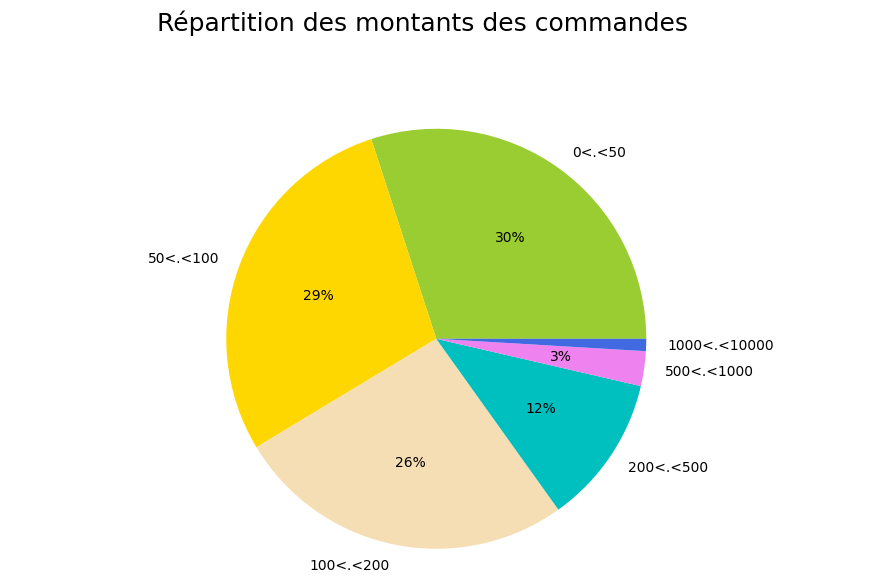

In [30]:
# ____________________
# Décompte des achats
price_range = [0, 50, 100, 200, 500, 1000, 10000]
count_price = []
for i, price in enumerate(price_range):
    if i == 0:
        continue
    # val = df4[(df4.price < price) &
    #                  (df4.price > price_range[i-1])]['price'].count()
    val = total_price_per_order[(total_price_per_order.price < price) &
                                (total_price_per_order.price > price_range[i-1])]['price'].count()
    count_price.append(val)
# ____________________________________________
# Représentation du nombre d'achats / montant
#plt.rc('font', weight='bold')
f, ax = plt.subplots(figsize=(11, 6))
colors = ['yellowgreen', 'gold', 'wheat',
          'c', 'violet', 'royalblue', 'firebrick']
labels = ['{}<.<{}'.format(price_range[i-1], s)
          for i, s in enumerate(price_range) if i != 0]
sizes = count_price
explode = [0.0 if sizes[i] < 100 else 0.0 for i in range(len(sizes))]

ax.pie(sizes, explode=explode, labels=labels, colors=colors,
       autopct=lambda x: '{:1.0f}%'.format(x) if x > 1 else '',
       shadow=False, startangle=0)
ax.axis('equal')
f.text(0.5, 1.01, "Répartition des montants des commandes",
       ha='center', fontsize=18)

#### Catégories des produits

In [31]:
df7.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [32]:
# Distribution des catégories des produits
product_category = pd.DataFrame(df7.groupby('product_category_name')[
                                'product_category_name'].count().reset_index(name='counts'))
product_category = product_category.sort_values(by='counts', ascending=True)
product_category

,product_category_name,counts
17,cds_dvds_musicais,1
67,seguros_e_servicos,2
60,pc_gamer,3
37,fashion_roupa_infanto_juvenil,5
15,casa_conforto_2,5
...,...,...
72,utilidades_domesticas,2335
11,beleza_saude,2444
54,moveis_decoracao,2657
32,esporte_lazer,2867


In [33]:
product_category.product_category_name.nunique()

73

Text(0.5, 1.0, 'Distribution des catégories de produits')

<Figure size 2100x4000 with 0 Axes>

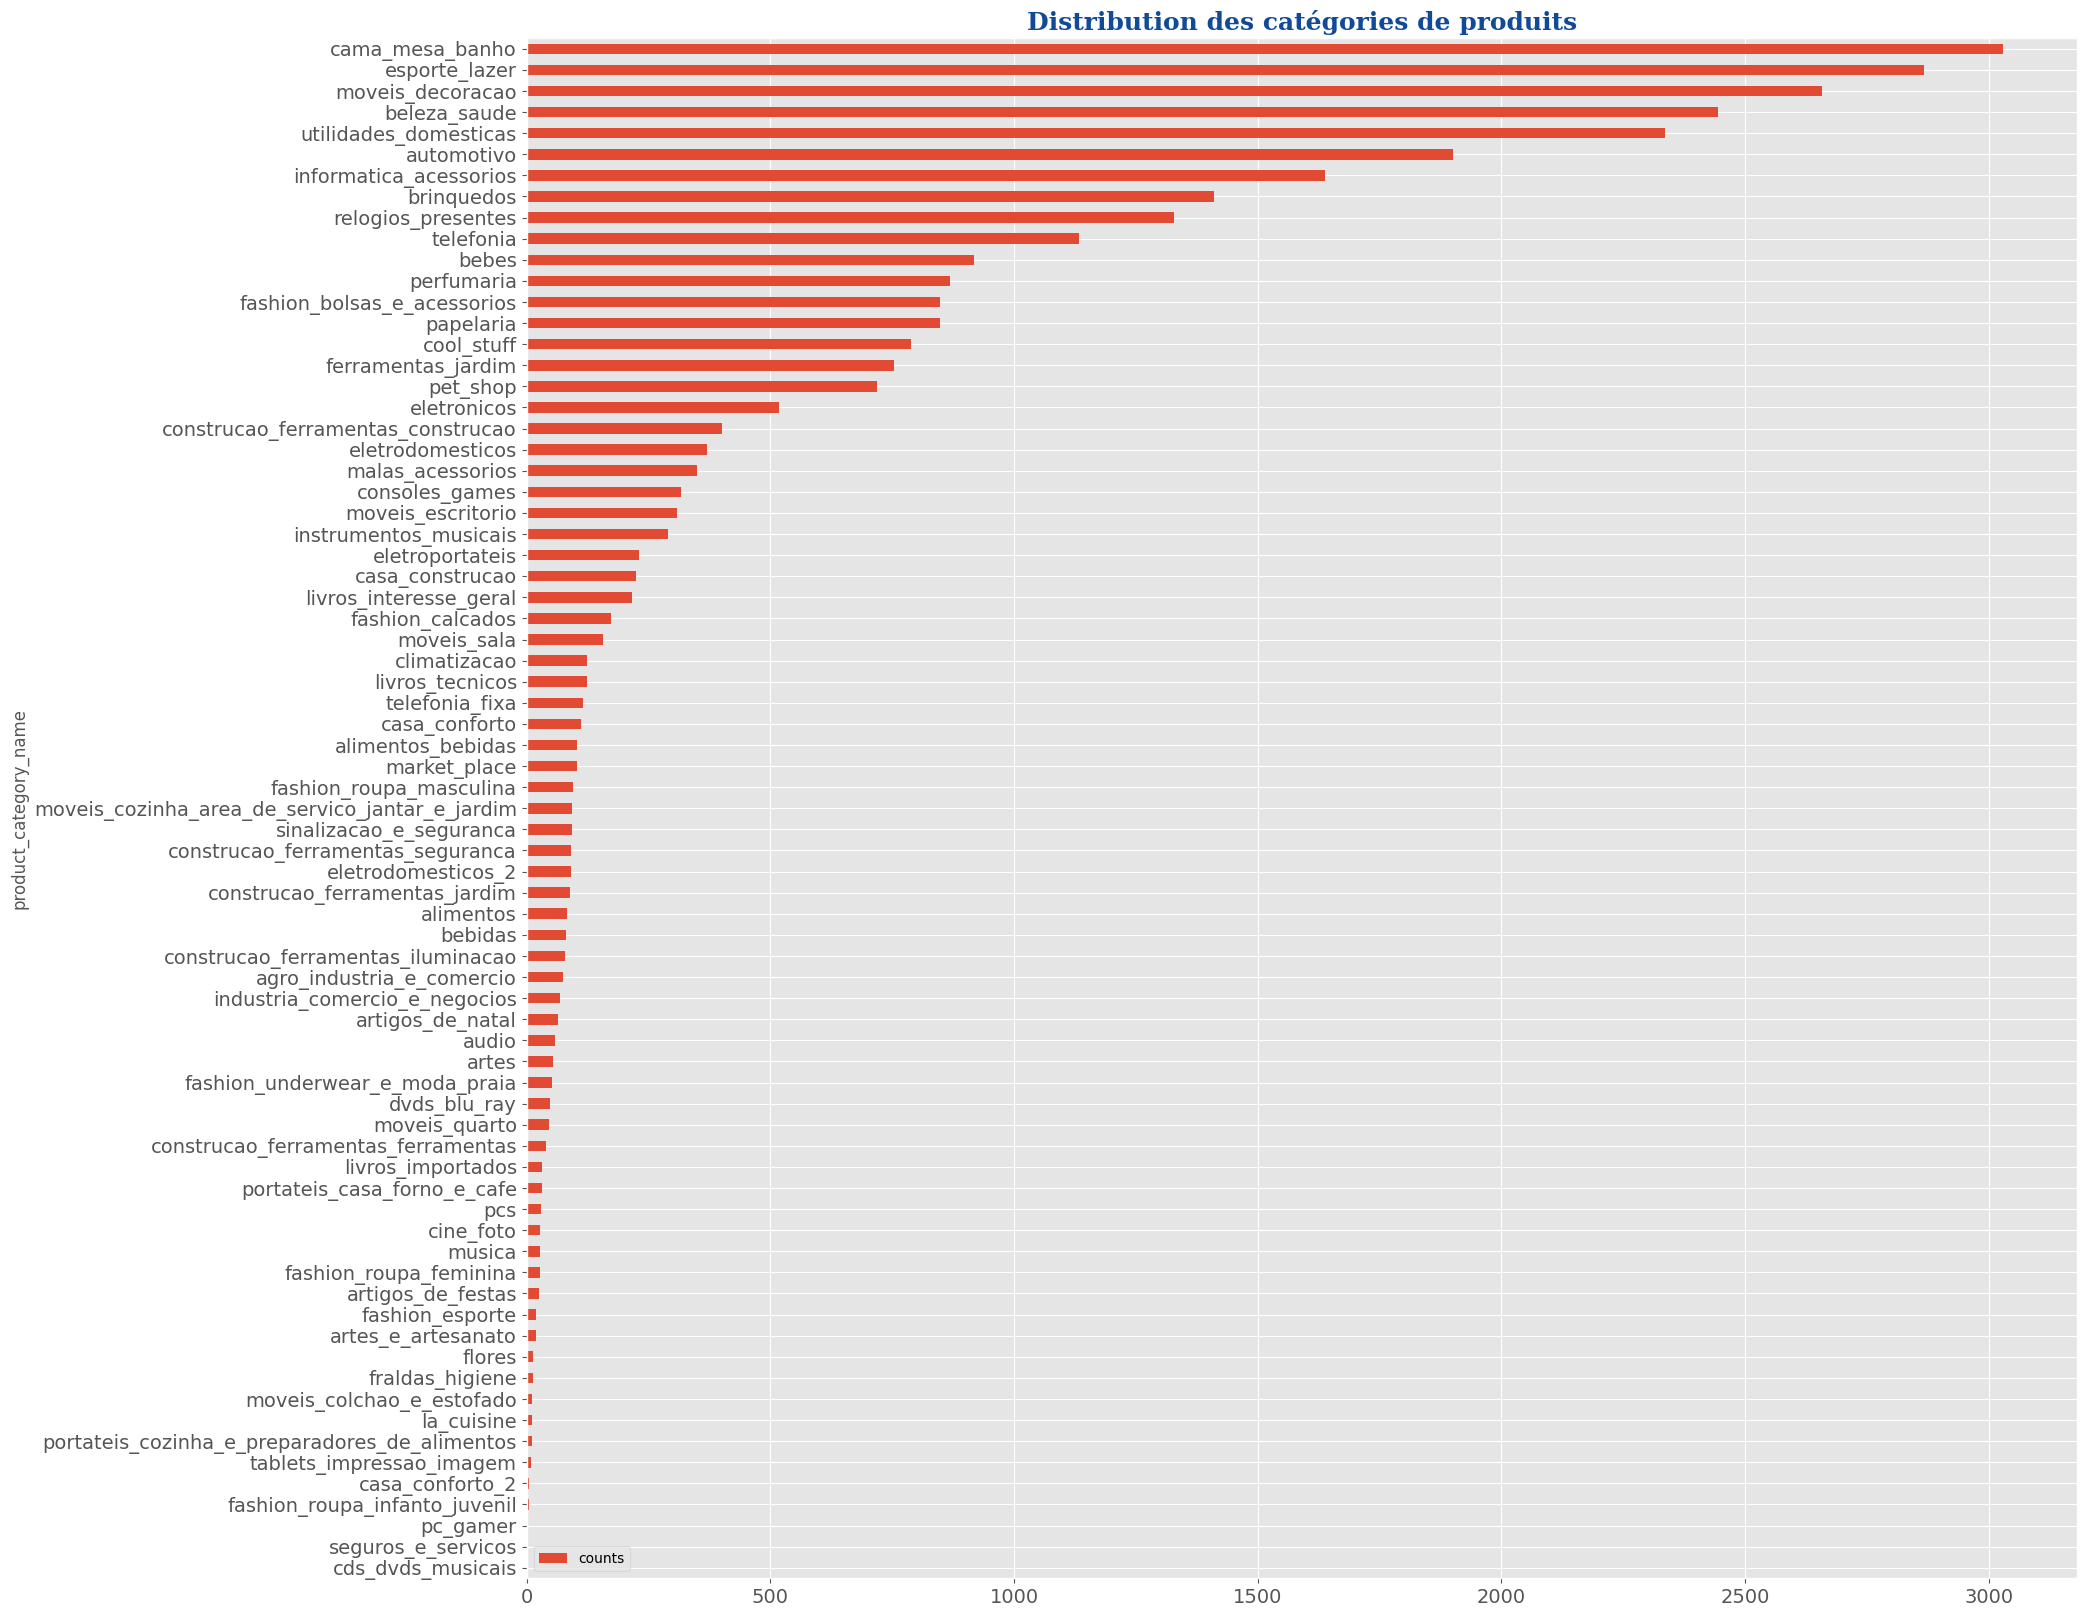

In [34]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.style.use('ggplot')

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
              }
fig = plt.figure(figsize=(21, 40))
product_category.plot(y='counts', x='product_category_name',
                      kind='barh', figsize=(20, 20))
plt.title('Distribution des catégories de produits', fontdict=font_title)

In [35]:
df3['order_purchase_timestamp'] = pd.to_datetime(
    df3['order_purchase_timestamp'])
df3 = df3.sort_values(by='order_purchase_timestamp', ascending=True)

#### Distribution des commandes selon le mois

In [36]:
dfx = df3.copy()
dfx['month'] = dfx['order_purchase_timestamp'].dt.month_name()
dfx['month_number'] = dfx['order_purchase_timestamp'].dt.month
dfx['day'] = dfx['order_purchase_timestamp'].dt.day_name()
dfx['day'].unique()

array(['Thursday', 'Monday', 'Tuesday', 'Wednesday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [37]:
cmd_month = pd.DataFrame(dfx.groupby('month')['order_id'].count()).\
    rename(columns={'order_id': 'nb_commande'}).reset_index()
# cmd_date['month']=cmd_date['order_purchase_timestamp'].dt.month
# cmd_month

<AxesSubplot: ylabel='month'>

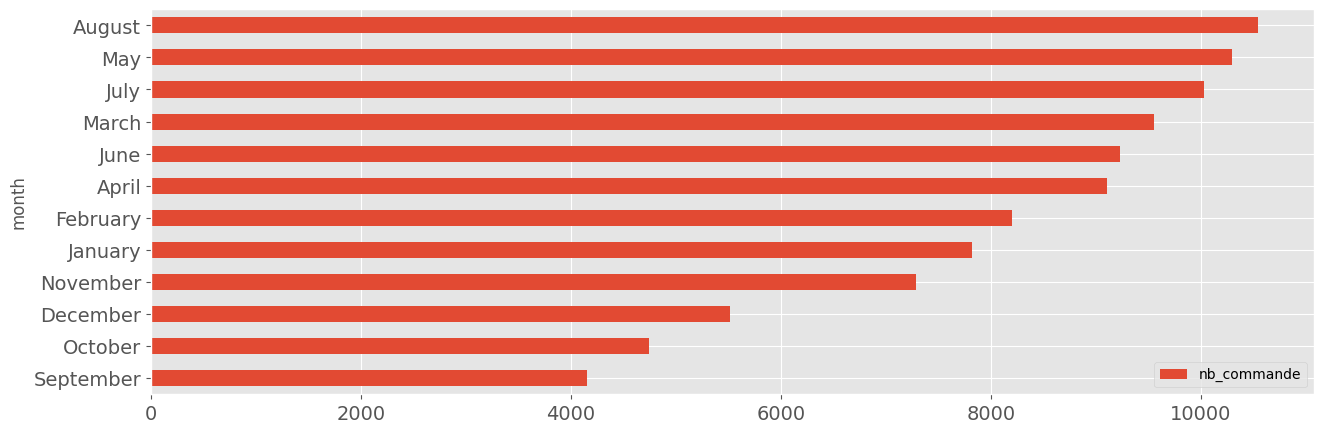

In [38]:
cmd_month = cmd_month.sort_values(by='nb_commande', ascending=True)
cmd_month.plot(y='nb_commande', x='month', kind='barh', figsize=(15, 5))

#### Distribution des commandes selon le jour de la semaine

In [39]:
cmd_date = pd.DataFrame(dfx.groupby('day')['order_id'].count()).\
    rename(columns={'order_id': 'nb_commande'}).reset_index()
# cmd_date['month']=cmd_date['order_purchase_timestamp'].dt.month
cmd_date.dtypes

day            object
nb_commande     int64
dtype: object

In [40]:
cmd_date

,day,nb_commande
0,Friday,13680
1,Monday,15701
2,Saturday,10547
3,Sunday,11631
4,Thursday,14320
5,Tuesday,15502
6,Wednesday,15074


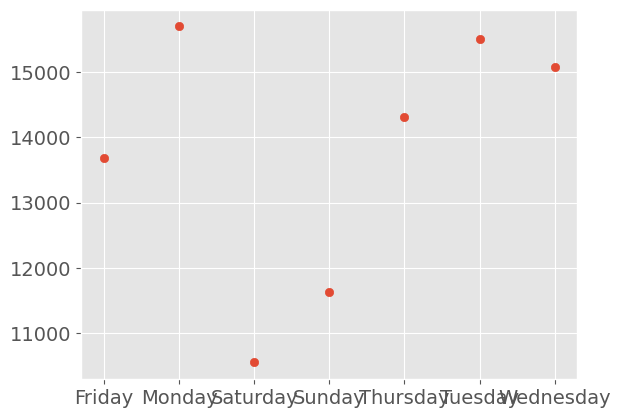

In [41]:
#cmd_date.plot( y='nb_commande', x='month',kind='barh',figsize=(20,20))
plt.scatter(cmd_date['day'], cmd_date['nb_commande'])

<AxesSubplot: ylabel='day'>

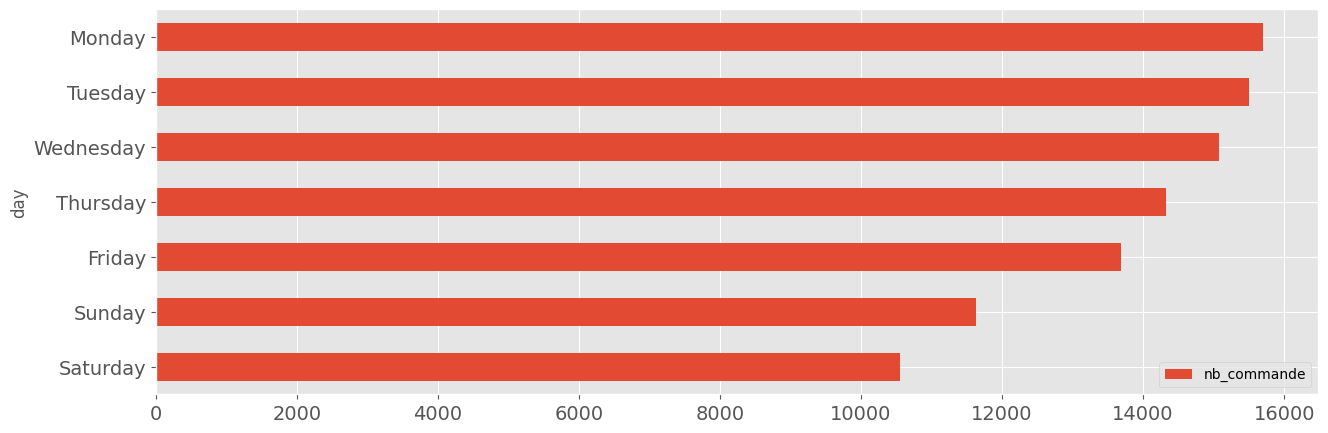

In [42]:
cmd_date = cmd_date.sort_values(by='nb_commande', ascending=True)
cmd_date.plot(y='nb_commande', x='day', kind='barh', figsize=(15, 5))

In [43]:
dx = df3.copy()
dx['order_purchase_timestamp'] = pd.to_datetime(
    dx['order_purchase_timestamp']).dt.date
dx.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [44]:
df6.columns

Index(['review_id', 'order_id', 'review_score', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

#### Distribution des review score

array([[<AxesSubplot: title={'center': 'review_score'}>]], dtype=object)

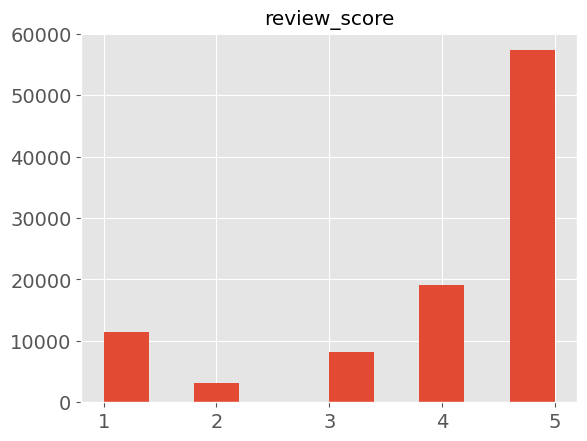

In [45]:
df6.hist(column='review_score')


### 4.Création du datset commandes et sauvegrde des données<a class="anchor" id="com"></a>

In [46]:
# Ici on crée un dataset nommée commande_dataset contenant toute les information d'une commande

# jointure entre df1 et df3 (dataset products et dataset order)
df13 = pd.merge(df1, df3, on='customer_id')
df13 = df13[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state', 'order_id', 'order_status',
             'order_purchase_timestamp']]
# df13.head()

In [47]:
df134 = pd.merge(df13, df4, on='order_id')
df134 = df134[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
               'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
              'product_id', 'seller_id', 'price']]
# df134.head()

In [48]:
df1345 = pd.merge(df134, df5, on='order_id')
df1345 = df1345[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
                 'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
                'product_id', 'seller_id', 'price', 'payment_type']]
# df1345.head()

In [49]:
df13456 = pd.merge(df1345, df6, on='order_id')
df13456 = df13456[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
                   'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
                  'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
                   'review_score']]
# df13456.head()

In [50]:
df134567 = pd.merge(df13456, df7, on='product_id')
df134567 = df134567[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
                     'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
                    'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
                     'review_score', 'product_category_name']]
# df134567.head()

In [51]:
df1345678 = pd.merge(df134567, df8, on='seller_id')
# df1345678.columns

In [52]:
commandes = df1345678
commandes['order_purchase_timestamp'] = pd.to_datetime(
    commandes['order_purchase_timestamp'])

In [53]:
commandes.dtypes

customer_id                         object
customer_unique_id                  object
customer_city                       object
customer_state                      object
order_id                            object
order_status                        object
order_purchase_timestamp    datetime64[ns]
order_item_id                        int64
product_id                          object
seller_id                           object
price                              float64
payment_type                        object
review_id                           object
review_score                         int64
product_category_name               object
seller_zip_code_prefix               int64
seller_city                         object
seller_state                        object
dtype: object

<AxesSubplot: >

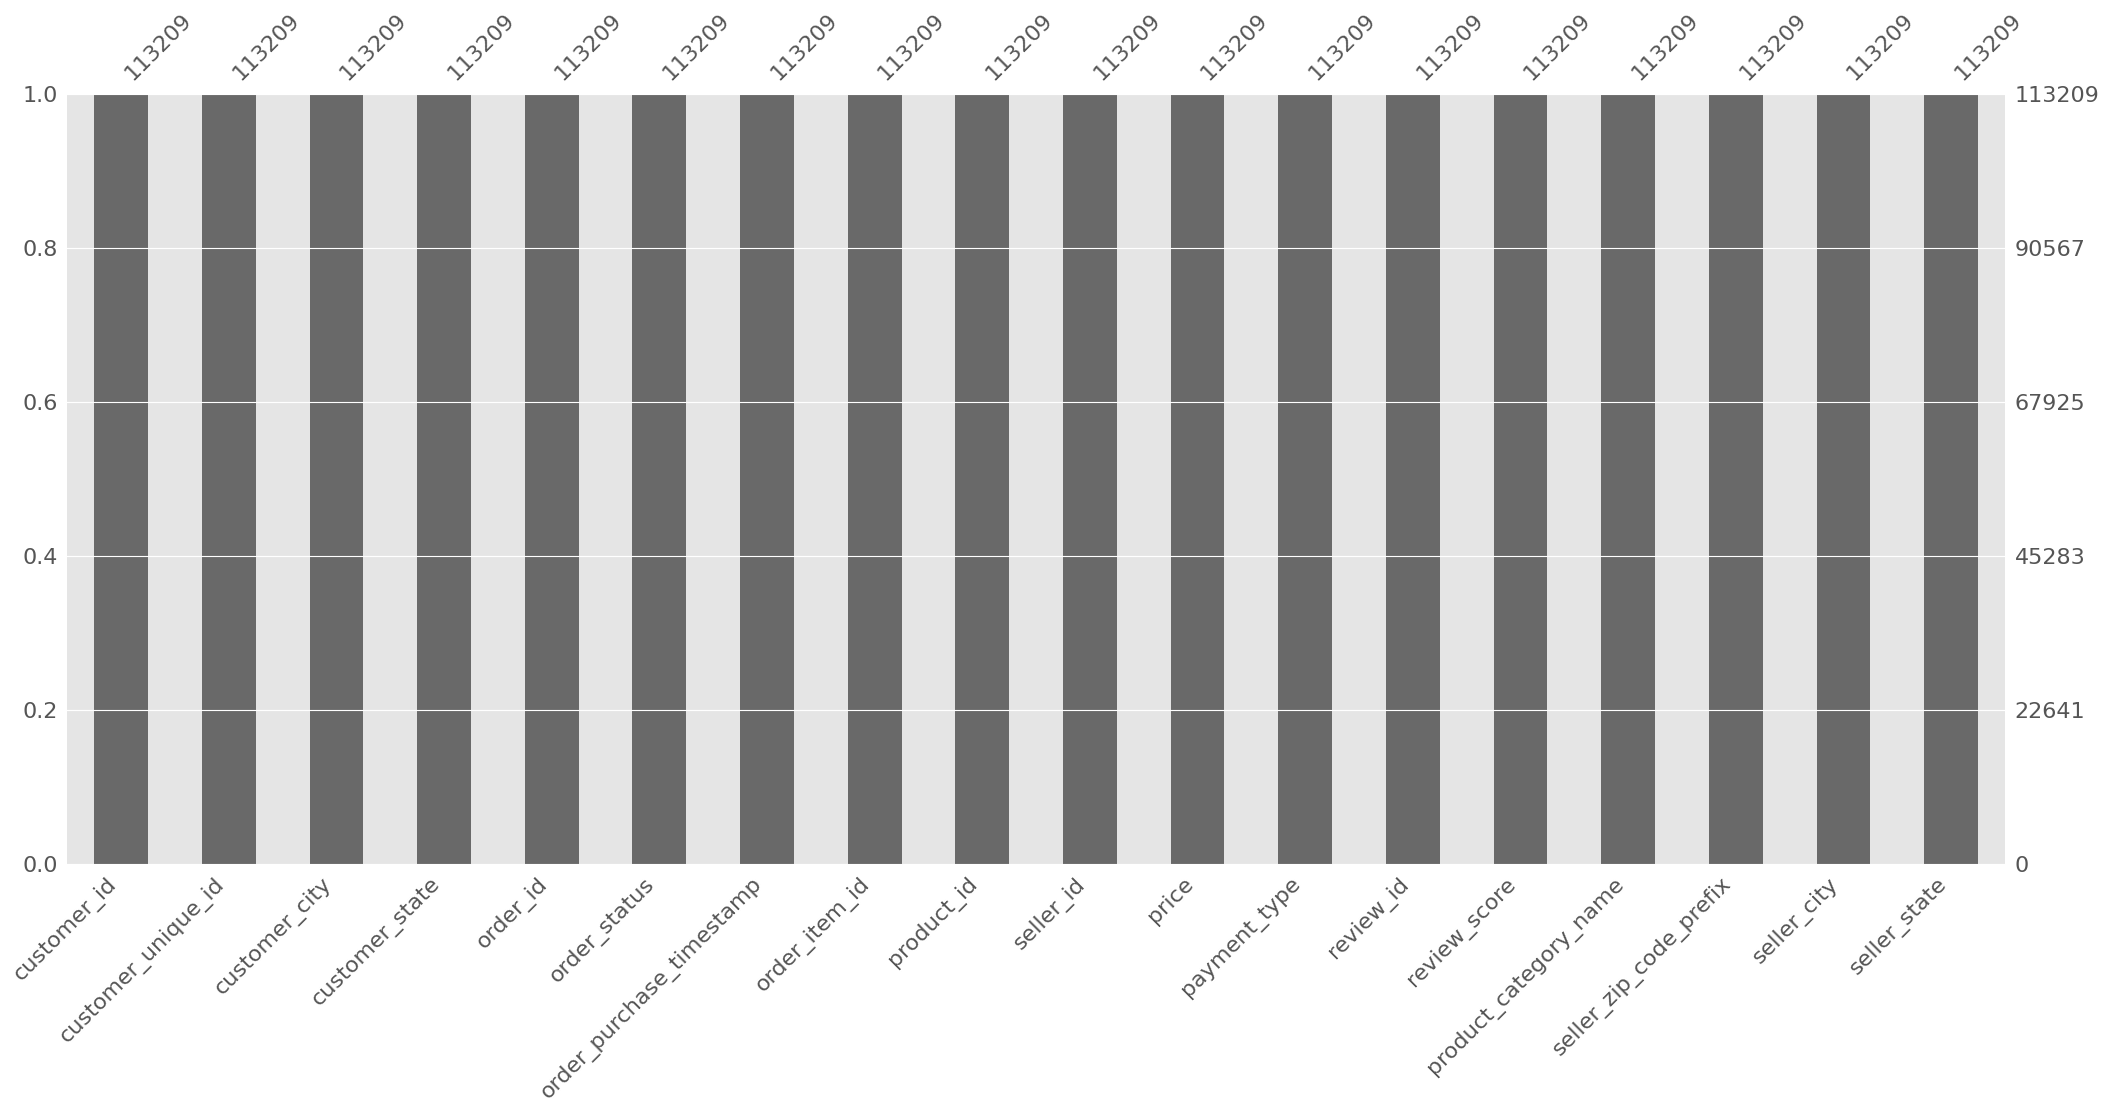

In [54]:
msno.bar(commandes)

In [55]:
#print('Entrées dupliquées: {}'.format(commandes.duplicated().sum()))
commandes.drop_duplicates(inplace=True)

In [56]:
# Ici je vais garder le data set localisation df2
df2.to_csv('geolocalisation_dataset.csv', index=False)
commandes.to_csv('commandes_dataset.csv', index=False)
#df2.to_csv('geolocalisation_dataset.csv', sep='\t',index=False)

### 5.Feature engineering<a class="anchor" id="fe"></a>

#### Fréquence : combien de fois chaque   client a-t-il effectué un achat ?

In [57]:
# nbre de commandes par client
nb_order_per_customer = pd.DataFrame(commandes.groupby('customer_unique_id')['customer_id'].count())\
    .rename(columns={'customer_id': 'frequency'}).reset_index()
nb_order_per_customer
freq = nb_order_per_customer
freq.shape

(91478, 2)

#### Mois d'achat

In [58]:
customers_month_purshase = commandes[[
    'customer_unique_id', 'order_purchase_timestamp']]
customers_month_purshase.insert(loc=1,
                                column='month_purshase',
                                value=customers_month_purshase['order_purchase_timestamp'].dt.month_name())

# customers_month_purshase
customers_month_purshase = pd.DataFrame(customers_month_purshase.groupby('customer_unique_id')['month_purshase'].agg(lambda x: x.value_counts().index[0])).\
    rename(columns={'month_purshase': 'favorite_purshase_month'}).reset_index()
customers_month_purshase.head()

,customer_unique_id,favorite_purshase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,May
2,0000f46a3911fa3c0805444483337064,March
3,0000f6ccb0745a6a4b88665a16c9f078,October
4,0004aac84e0df4da2b147fca70cf8255,November


In [59]:
freq1 = pd.merge(freq, customers_month_purshase, on='customer_unique_id')
freq1

,customer_unique_id,frequency,favorite_purshase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May
2,0000f46a3911fa3c0805444483337064,1,March
3,0000f6ccb0745a6a4b88665a16c9f078,1,October
4,0004aac84e0df4da2b147fca70cf8255,1,November
...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,June
91474,fffea47cd6d3cc0a88bd621562a9d061,1,December
91475,ffff371b4d645b6ecea244b27531430a,1,February
91476,ffff5962728ec6157033ef9805bacc48,1,May


#### Récence d'un client : à quel moment un client a effectué un dernier achat?

In [60]:
# Ici on détermine à quel moment un client a effectué un dernier achat

# la date NOW à un jour après le dernier achat.
NOW = commandes['order_purchase_timestamp'].max() + timedelta(days=1)
rec = pd.DataFrame(commandes.groupby('customer_unique_id')['order_purchase_timestamp'].max())\
    .rename(columns={'order_purchase_timestamp': 'last_purshase_date'}).reset_index()

freq_rec = pd.merge(freq1, rec, on='customer_unique_id')
freq_rec

,customer_unique_id,frequency,favorite_purshase_month,last_purshase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,1,March,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,1,October,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,1,November,2017-11-14 19:45:42
...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,June,2017-06-08 21:00:36
91474,fffea47cd6d3cc0a88bd621562a9d061,1,December,2017-12-10 20:07:56
91475,ffff371b4d645b6ecea244b27531430a,1,February,2017-02-07 15:49:16
91476,ffff5962728ec6157033ef9805bacc48,1,May,2018-05-02 15:17:41


#### Montant

In [61]:
amount = pd.DataFrame(commandes.groupby('customer_unique_id')['price'].sum())\
    .rename(columns={'price': 'total_price'}).reset_index()
amount.shape

(91478, 2)

In [62]:
freq_rec_m = pd.merge(freq_rec, amount, on='customer_unique_id', how='inner')

freq_rec_m.shape

(91478, 5)

In [63]:
freq_rec_m['DaysSinceOrder'] = freq_rec_m['last_purshase_date'].apply(
    lambda x: (NOW - x).days)
freq_rec_m.head()

,customer_unique_id,frequency,favorite_purshase_month,last_purshase_date,total_price,DaysSinceOrder
0,0000366f3b9a7992bf8c76cfdf3221e2,1,May,2018-05-10 10:56:27,129.90,112
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,May,2018-05-07 11:11:27,18.90,115
2,0000f46a3911fa3c0805444483337064,1,March,2017-03-10 21:05:03,69.00,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,October,2017-10-12 20:29:41,25.99,321
4,0004aac84e0df4da2b147fca70cf8255,1,November,2017-11-14 19:45:42,180.00,288


In [64]:
RFM_with_date = freq_rec_m[['customer_unique_id', 'frequency', 'DaysSinceOrder', 'total_price', 'last_purshase_date',
                            'favorite_purshase_month']].rename(columns={'frequency': 'Frequency', 'DaysSinceOrder': 'Recency', 'total_price': 'Monetary'})

RFM_with_date

,customer_unique_id,Frequency,Recency,Monetary,last_purshase_date,favorite_purshase_month
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,2018-05-10 10:56:27,May
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,2018-05-07 11:11:27,May
2,0000f46a3911fa3c0805444483337064,1,537,69.00,2017-03-10 21:05:03,March
3,0000f6ccb0745a6a4b88665a16c9f078,1,321,25.99,2017-10-12 20:29:41,October
4,0004aac84e0df4da2b147fca70cf8255,1,288,180.00,2017-11-14 19:45:42,November
...,...,...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,447,1570.00,2017-06-08 21:00:36,June
91474,fffea47cd6d3cc0a88bd621562a9d061,1,262,64.89,2017-12-10 20:07:56,December
91475,ffff371b4d645b6ecea244b27531430a,1,568,89.90,2017-02-07 15:49:16,February
91476,ffff5962728ec6157033ef9805bacc48,1,119,115.00,2018-05-02 15:17:41,May


In [65]:
RFM_with_date.to_csv('df_rfm_date.csv', index=False)

In [69]:
scores_review_customers = pd.DataFrame(commandes.groupby('customer_unique_id')['review_score'].mean())\
    .rename(columns={'review_score': 'review_score_mean'}).reset_index()
RFM_date_score_review = pd.merge(
    RFM_with_date, scores_review_customers, on='customer_unique_id')
RFM_date_score_review['last_purshase_date'] = pd.to_datetime(
    RFM_date_score_review['last_purshase_date'])
RFM_date_score_review.head()

,customer_unique_id,Frequency,Recency,Monetary,last_purshase_date,favorite_purshase_month,review_score_mean
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90,2018-05-10 10:56:27,May,5.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90,2018-05-07 11:11:27,May,4.0
2,0000f46a3911fa3c0805444483337064,1,537,69.00,2017-03-10 21:05:03,March,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,321,25.99,2017-10-12 20:29:41,October,4.0
4,0004aac84e0df4da2b147fca70cf8255,1,288,180.00,2017-11-14 19:45:42,November,5.0


In [70]:
RFM_date_score_review.to_csv('df_rfm_date_score.csv', index=False)

In [309]:
RFM_with_date.dtypes

customer_unique_id                 object
Frequency                           int64
Recency                             int64
Monetary                          float64
last_purshase_date         datetime64[ns]
favorite_purshase_month            object
dtype: object

In [236]:
RFM = freq_rec_m[['customer_unique_id', 'frequency', 'DaysSinceOrder', 'total_price']].rename(
    columns={'frequency': 'Frequency', 'DaysSinceOrder': 'Recency', 'total_price': 'Monetary'})

RFM

,customer_unique_id,Frequency,Recency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,1,112,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,115,18.90
2,0000f46a3911fa3c0805444483337064,1,537,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,1,321,25.99
4,0004aac84e0df4da2b147fca70cf8255,1,288,180.00
...,...,...,...,...
91473,fffcf5a5ff07b0908bd4e2dbc735a684,2,447,1570.00
91474,fffea47cd6d3cc0a88bd621562a9d061,1,262,64.89
91475,ffff371b4d645b6ecea244b27531430a,1,568,89.90
91476,ffff5962728ec6157033ef9805bacc48,1,119,115.00


#### Analyse des features 

In [237]:
RFM[["Recency", "Frequency", "Monetary"]].agg(["mean"])

,Recency,Frequency,Monetary
mean,237.047662,1.211712,144.949038


In [238]:
RFM.describe()

,Frequency,Recency,Monetary
count,91478.000000,91478.000000,91478.000000
mean,1.211712,237.047662,144.949038
std,0.679484,152.560470,220.997009
min,1.000000,1.000000,0.850000
25%,1.000000,114.000000,48.900000
50%,1.000000,218.000000,89.900000
75%,1.000000,345.000000,159.000000
max,24.000000,695.000000,13440.000000


**Observations**<br>
-La moyenne de la récnce est ~237j <br>
-en moyenne un client achète un article 1 fois(1.2)<br>
-et dépensant un prix unitaire moyen de 144.94 (unié de prix).

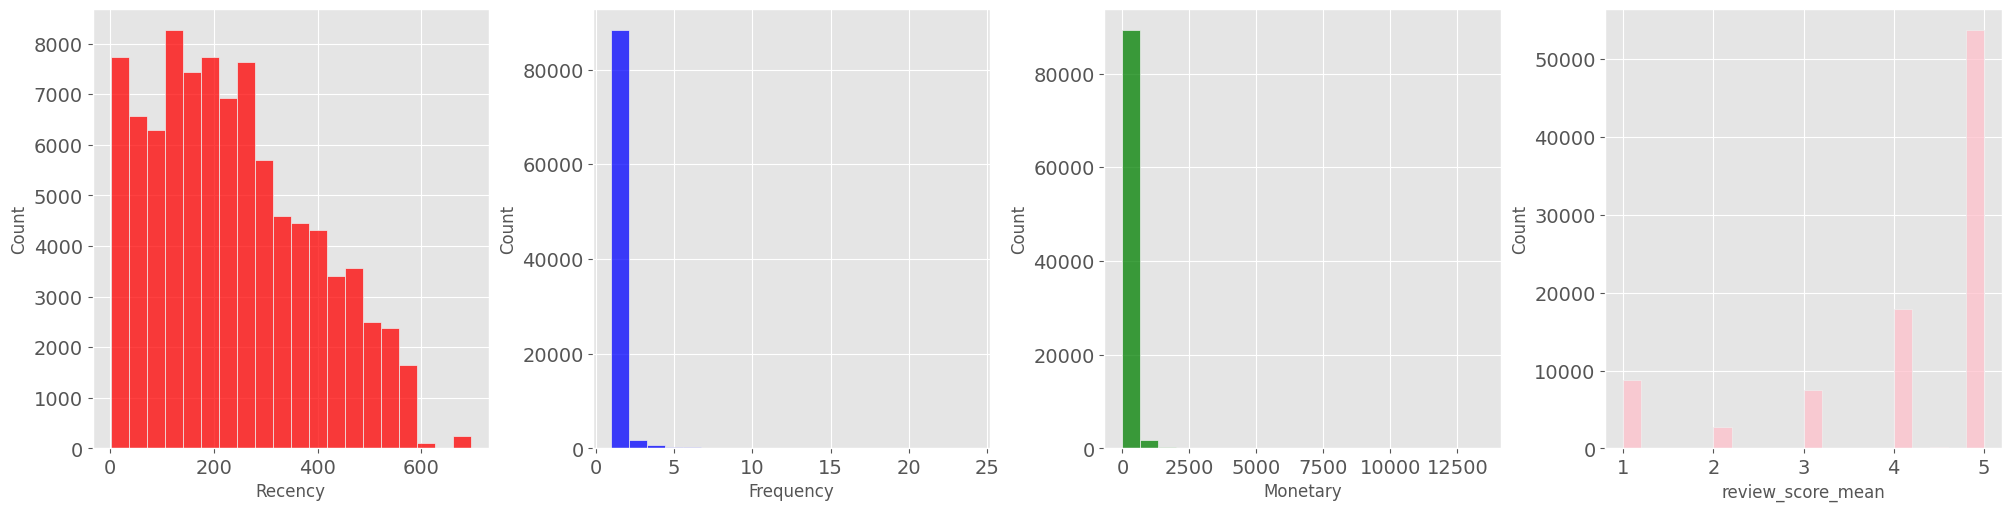

In [71]:
# Visualizing the Recency, Frequency and Monetary distributions.
i = 0
fig = plt.figure(constrained_layout=True, figsize=(20, 5))
gs = GridSpec(1, 4, figure=fig)
X = RFM_date_score_review[["Recency",
                           "Frequency", "Monetary", "review_score_mean"]]
col = ['red', 'blue', 'green', 'pink']
for var in list(X.columns):

    plt.subplot(gs[0, i])
    sns.histplot(data=X, x=X[var], color=col[i], bins=20)
    #sns.histplot(X[var],color= col[i],kde=True,bins=20)

    #plt.title('Skewness ' + ': ' + round(RFM[var].skew(),2).astype(str))
    i = i+1

In [72]:
RFM_date_score_review.shape

(91478, 7)

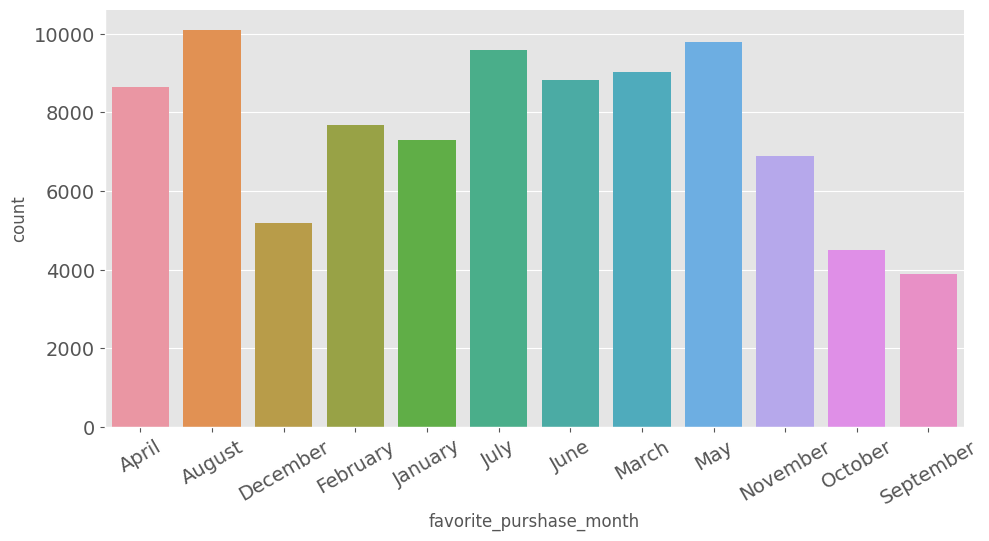

In [240]:
RFM_with_date = RFM_with_date.sort_values(
    by="favorite_purshase_month", ascending=True)
g = sns.catplot(data=RFM_with_date, x="favorite_purshase_month",
                kind="count", height=5, aspect=2)
g.set_xticklabels(rotation=30)

In [241]:
def scatter_pair(lists, df, nb_var, xstring=False):
    #plt.rc('font', size=16)
    #font = {'weight' : 'bold','size'   : 12}

    #plt.rc('font', **font)
    fig = plt.figure(constrained_layout=True, figsize=(25, 5))
    gs = GridSpec(1, nb_var, figure=fig)
    #"Recency", "Frequency", "Monetary"
    #lists=[["Recency", "Frequency"],["Recency","Monetary"],["Frequency","Monetary"]]
    # lists=[["Recency", "Frequency"],["Recency","Monetary"],["Frequency","Monetary"],
    #      ["Recency", 'favorite_purshase_month'],["Frequency","favorite_purshase_month"],["Monetary","favorite_purshase_month"]]
    i = 0
    for c in lists:
        plt.subplot(gs[0, i])
        g = sns.scatterplot(data=df, x=c[0], y=c[1])
        if (xstring == True):
            # g.set_xticklabels(rotation=30)
            g.set_xticklabels(g.get_xticklabels(), rotation=30)

        i = i+1

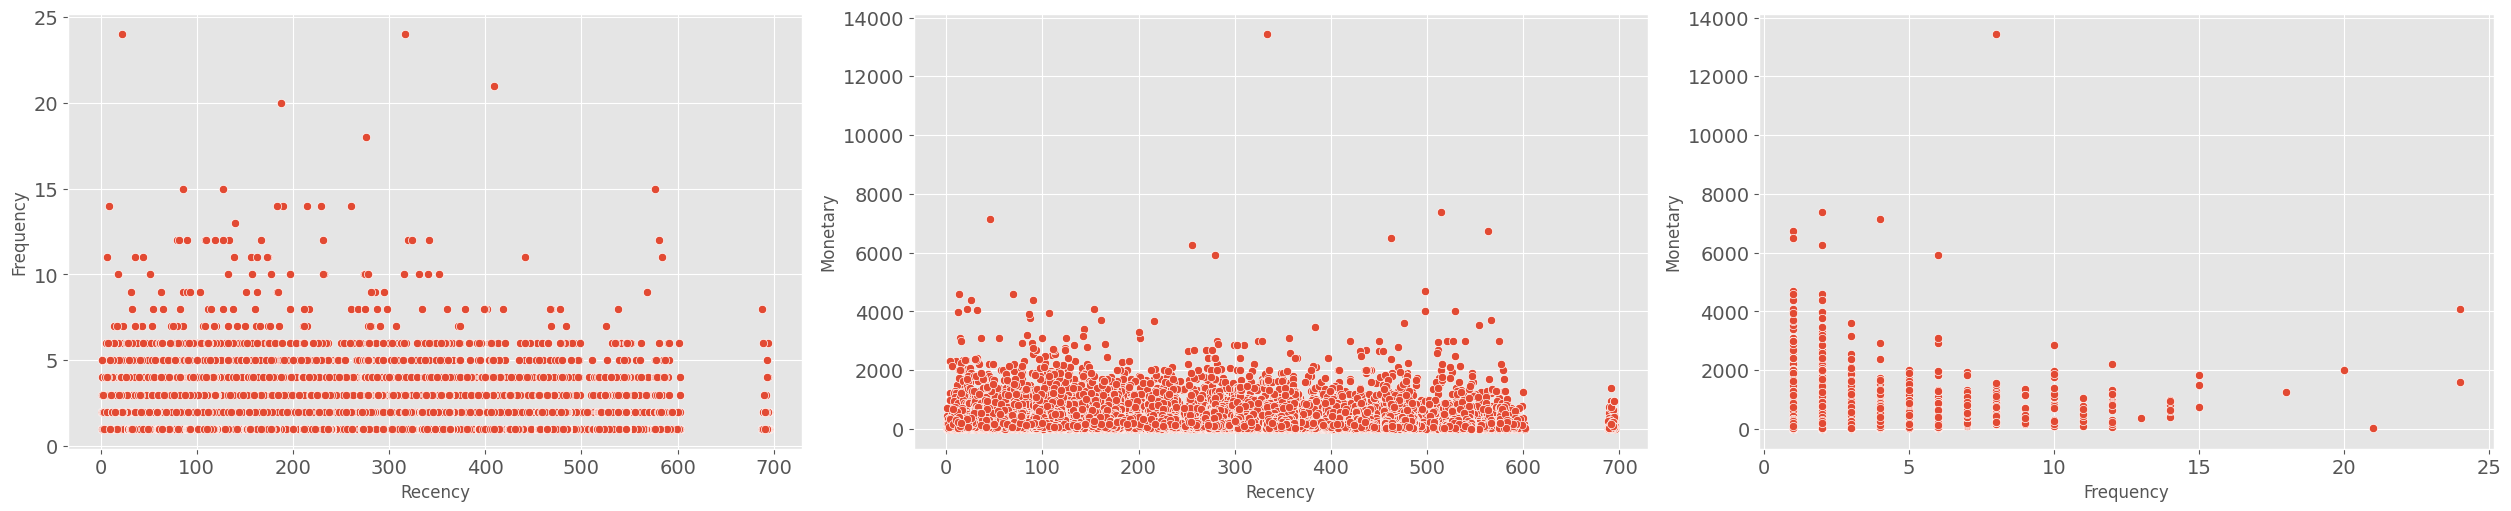

In [242]:
lists1 = [["Recency", "Frequency"], [
    "Recency", "Monetary"], ["Frequency", "Monetary"]]
scatter_pair(lists1, RFM_with_date, 3)

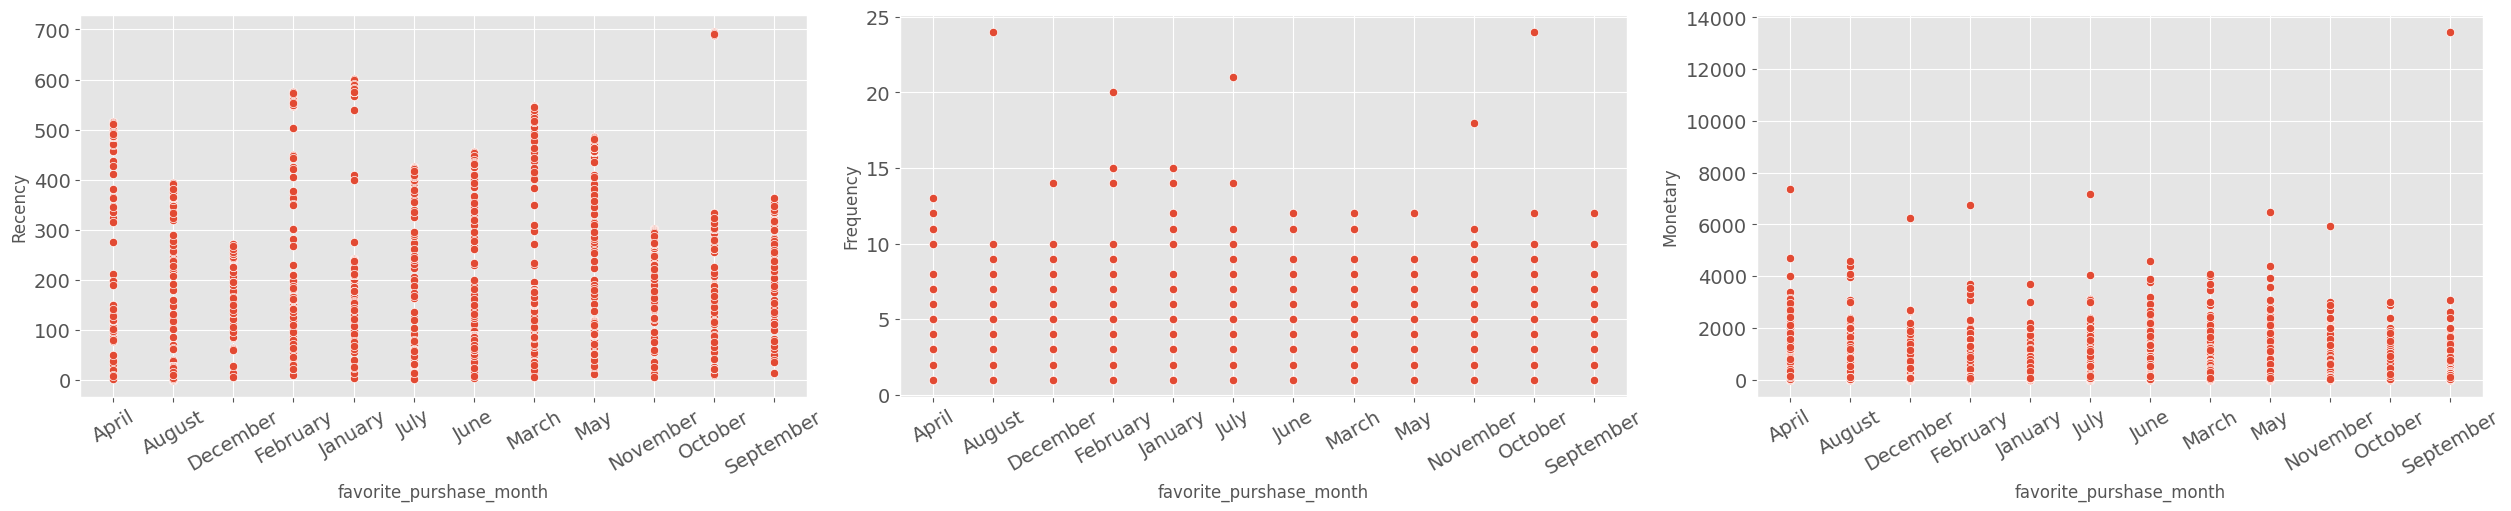

In [243]:
lists2 = [['favorite_purshase_month', "Recency"], [
    "favorite_purshase_month", "Frequency"], ["favorite_purshase_month", "Monetary"]]
scatter_pair(lists2, RFM_with_date, 3, xstring=True)

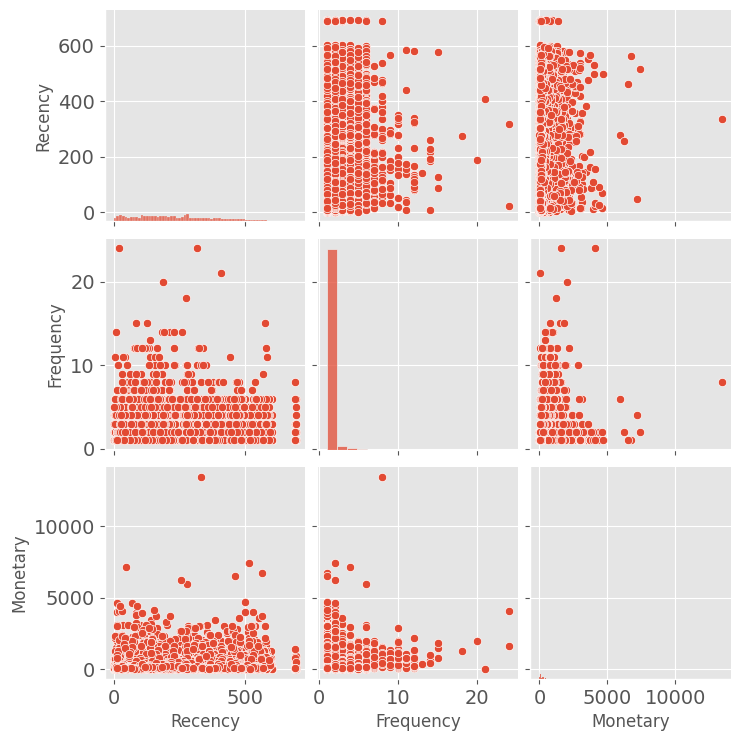

In [244]:
RFM_data = RFM[["Recency", "Frequency", "Monetary"]]

sns.pairplot(RFM_data)

In [245]:
commandes.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'price', 'payment_type', 'review_id',
       'review_score', 'product_category_name', 'seller_zip_code_prefix',
       'seller_city', 'seller_state'],
      dtype='object')

In [246]:
commandes.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)